# Brain Tumor Detection Using Parallel Processing

## Assignment Overview
In this assignment, you will be tasked with developing a machine learning model for detecting brain tumors from MRI images. You will leverage the power of parallel processing to efficiently handle the large dataset and speed up the computation-intensive tasks involved in image processing and model training.

## Dataset
The dataset consists of MRI images classified into two categories:
- `yes`: Images that contain brain tumors.
- `no`: Images that do not contain brain tumors.

Your goal is to preprocess these images using various filters and techniques, extract relevant features, then train a machine learning model to accurately classify the images as having a tumor or not.

## Parallel Processing
To optimize the performance of your image processing and model training, you are required to implement parallel processing techniques. This could involve using Python's `multiprocessing` and `threading` module to parallelize tasks such as image preprocessing, feature extraction (applying filters), or model training.

## Objectives
1. Load the MRI images using OpenCV.
2. Implement parallel processing to efficiently handle image processing and model training.
3. Train a machine learning model for brain tumor classification.
4. Evaluate the performance of your model on a test set.

## Submission
- Your submission should include the completed Jupyter Notebook with all the code for loading the data, preprocessing, parallel processing implementation, model training, and evaluation. 
- Additionally, provide a brief report discussing your approach, and explaining your code the results obtained.


# Part I: Guided Code (60%)
The following cells in this notebook will demonstrate a sequential example of the brain tumor detection process. This example includes steps such as data loading, pre-processing, feature extraction using methods like GLCM (Gray Level Co-occurrence Matrix) and LBP (Local Binary Patterns), and finally, classification. This sequential process serves as a baseline for what you are expected to parallelize.

## Your Task
After understanding the sequential processing steps, your task is to refactor the code to utilize multiprocessing or multithreading approaches, aiming to reduce the overall processing time. You should focus on parallelizing the most time-consuming tasks identified in the sequential example, such as image processing and feature extraction.

<span style="color: red;">**Remember**: the efficiency of your parallel processing implementation will be evaluated based on the reduction in processing time and the accuracy of your model.</span>

## Data Reading

In this section, we will load the MRI images from the dataset. The dataset consists of two folders: `yes` and `no`, representing images with and without brain tumors, respectively. We will use the `glob` module to list all the image files in these directories and then read them into memory for further processing.

### Creating a reading function

In [3]:
import glob
import cv2

def read_images(images_path):
    """
    Reads all images from a specified path using OpenCV.

    Parameters:
        - images_path (str): The path to the directory containing the images.
    Returns:
        - images (list): A list of images read from the directory.
    """
    images = []
    for file_path in images_path:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
                images.append(image)
    return images

### Runing the reading function

In [23]:
# Define the path to the dataset
dataset_path = '../data/brain_tumor_dataset/'

# List all image files in the 'yes' and 'no' directories
yes_images = glob.glob(dataset_path + 'yes/*.*')
no_images = glob.glob(dataset_path + 'no/*.*')

yes_images = read_images(yes_images)
no_images = read_images(no_images)

print(f"Number of 'yes' images: {len(yes_images)}")
print(f"Number of 'no' images: {len(no_images)}")

Number of 'yes' images: 155
Number of 'no' images: 98


## Appyling filters to the images

In this section, we apply various filters to the images to enhance their features. The filters used are:

1. **Entropy Filter**: This filter measures the randomness in the image, highlighting regions with high information content (e.g., edges).

2. **Gaussian Filter**: This filter smooths the image by blurring it, reducing noise and details.

3. **Sobel Filter**: This edge-detection filter highlights the gradients (edges) in the image.

4. **Gabor Filter**: This filter is used for texture analysis, emphasizing edges and texture patterns.

5. **Hessian Filter**: This filter enhances blob-like structures in the image.

6. **Prewitt Filter**: Another edge-detection filter, similar to the Sobel filter, but with a different kernel.

The folowing code is how these filtres are applied to one image (<span style="color: red;">*Your job is to apply them to all images.*</span>).

### Code the applying the filters


In [24]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy import ndimage as nd
from skimage.filters import sobel, gabor, hessian, prewitt
import matplotlib.pyplot as plt

In [25]:
image = yes_images[0]

# Apply filters
entropy_img = entropy(image, disk(2))
gaussian_img = nd.gaussian_filter(image, sigma=1)
sobel_img = sobel(image)
gabor_img = gabor(image, frequency=0.9)[1]
hessian_img = hessian(image, sigmas=range(1, 100, 1))
prewitt_img = prewitt(image)

# Store the original and filtered images in a dictionary
filtered_images = {
    'Original': image,
    'Entropy': entropy_img,
    'Gaussian': gaussian_img,
    'Sobel': sobel_img,
    'Gabor': gabor_img,
    'Hessian': hessian_img,
    'Prewitt': prewitt_img
}

### Displaying the results

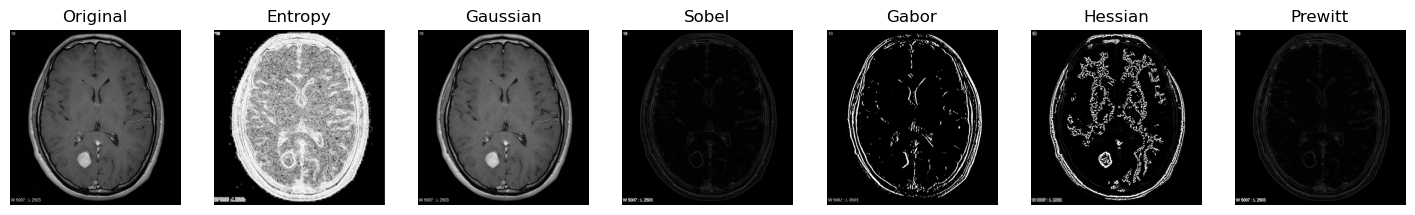

In [26]:
# Display each filtered image
plt.figure(figsize=(18, 3))
for i, (filter_name, filtered_image) in enumerate(filtered_images.items()):
        plt.subplot(1, len(filtered_images), i + 1)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(filter_name)
        plt.axis('off')
plt.show()

## <span style="color: blue;">Parallel Image Filtering</span>

In this part of the assignment, you will create a function for each filter and apply them in parallel to the images. You will store the results in dictionaries, similar to the example shown previously. Make sure to handle synchronization appropriately, as multiple threads or processes will access the images.

### <span style="color: green;">Tasks</span>
1. **Sequential execution:**
        1. Loop through the images in both lists: `yes_images` and `no_images` and apply the filters in parallel.
        2. For each image, create a dictionary containing the original and filtered images.
        3. Store these dictionaries in two lists: `yes_inputs` for images with tumors and `no_inputs` for images without tumors.
        4. Time the execution to compute the speed up and the efficiency later.
2. **Parallel execution:**
        1. Create a separate function for each filter and write to be executed in parallel using either multiprocessing or multithreading.
        2. Use a multiprocessing or multithreading (*whatever you wish, from what you have learned in this course*) to manage parallel execution of the filter functions on the images and or the concurrent application on multiple images at the same time.
        3. Implement synchronization mechanisms to ensure safe access to shared resources.
        4. Measure the execution time of the parallel processing to compare it with the sequential execution.
### <span style="color: red;">Warning</span>
- Be cautious about the concurrent access to images by multiple threads or processes. Use appropriate synchronization mechanisms to prevent race conditions and ensure data integrity.
- Carefully choose which parallelization paradigm you will use. *Efficiency* and *Speed* are of utmost importance. You need to see a positive impact on the speedup.
### <span style="color: green;">**Hint:**</span>
When you run you code for testing, run it only one the 4 or 5 first image. Only run on all images in the final version.

In [27]:
## The sequential version

import time
from tqdm import tqdm

def process_images(images):
    processed_images = []
    for image in tqdm(images):
        filtered_images = {
            'Original': image,
            'Entropy': entropy(image, disk(2)),
            'Gaussian': nd.gaussian_filter(image, sigma=1),
            'Sobel': sobel(image),
            'Gabor': gabor(image, frequency=0.9)[1],
            'Hessian': hessian(image, sigmas=range(1, 100, 1)),
            'Prewitt': prewitt(image)
        }
        processed_images.append(filtered_images)
    return processed_images

# Example usage
start_time = time.time()
yes_inputs = process_images(yes_images)
no_inputs = process_images(no_images)
end_time = time.time()

sequential_execution_time = end_time - start_time
print(f"Sequential execution time: {sequential_execution_time} seconds")


100%|██████████| 98/98 [1:00:51<00:00, 37.26s/it] 

Sequential execution time: 10913.172171115875 seconds


In [28]:
import time
from multiprocessing import Pool


# Function to process a single image
def process_single_image(image):
    return {
        'Original': image,
        'Entropy': entropy(image, disk(2)),
        'Gaussian': nd.gaussian_filter(image, sigma=1),
        'Sobel': sobel(image),
        'Gabor': gabor(image, frequency=0.9)[1],
        'Hessian': hessian(image, sigmas=range(1, 100, 1)),
        'Prewitt': prewitt(image)
    }

# Function to process images asynchronously and monitor progress
def process_images_in_parallel(images):
    processed_images = []
    
    # Callback to collect the result from each async process
    def collect_result(result):
        processed_images.append(result)
        pbar.update(1)  # Update progress bar on each completed task
    
    with Pool() as pool:
        # Create the progress bar
        with tqdm(total=len(images)) as pbar:
            # Submit each image for asynchronous processing using apply_async
            for image in images:
                pool.apply_async(process_single_image, args=(image,), callback=collect_result)
            
            # Close the pool and allow no more tasks
            pool.close()
            
            # Wait for all processes to complete
            pool.join()

    return processed_images

# Example usage
start_time = time.time()
yes_inputs = process_images_in_parallel(yes_images)
no_inputs = process_images_in_parallel(no_images)
end_time = time.time()

parallel_execution_time = end_time - start_time
print(f"Parallel execution time using apply_async with callback: {parallel_execution_time} seconds")


100%|██████████| 98/98 [18:13<00:00, 11.16s/it]

Parallel execution time using apply_async with callback: 3054.6989390850067 seconds


## Analsys:
- Explain you parallelization>
- Analyze the speedup and efficiency of the parallel execution. Discuss the results and any trade-offs encountered.


### In the parallelization part to speed up the processing of the image by distribtuing the takss to the multiple cores i used python multiprocessing.Pool , instead of processing images one by one this method allows us to process several images at same time .
### process_single_image - this funciton applied various filter as mentioned in above cells to a single image and it return the result as dictionary with the parameter taken is the image
### process_images_in_parallel this is an empty list that will store the results of each processed image. As each image is processed  and the result will be the filtered image which will be then added to the list.
### collect_result(result) When an image is done processing, its result is passed to collect_result, which: Adds the processed image to the processed_images list.Updates the progress bar (pbar.update(1)), visually showing that one more image has been processed.
### The Pool() object manages a set of worker processes. By default, it creates as many worker processes as there are CPU cores available on the system. This allows multiple images to be processed simultaneously.
###  Progress Bar (tqdm): A progress bar is created using tqdm(total=len(images)). This sets up a visual tracker showing how many images have been processed out of the total number.The total=len(images) part specifies how many (images) the bar should track.
### For each image in the images list, the code submits a task to the pool using pool.apply_async(process_single_image, args=(image,), callback=collect_result). apply_async: This function submits a task to the pool for processing but doesn't wait for the result (it's asynchronous). This means multiple tasks can be submitted and run in the background at the same time. Arguments (args): Each image is passed as an argument to the process_single_image function.Callback: When the image processing finishes, the result is passed to collect_result, which adds it to the list and updates the progress bar.
###  Closing the Pool:After all tasks (images) have been submitted to the pool, the pool is closed using pool.close(). This prevents any new tasks from being submitted to the pool. It's important to note that closing the pool does not stop the already submitted tasks; they will continue to run until they are finished.
### Waiting for Completion with pool.join():After closing the pool, we call pool.join(), which blocks the main program from proceeding until all the worker processes (i.e., image processing tasks) are done. This ensures that the function doesn’t return until all images have been processed and added to processed_images.
###  Returning Processed Images: Once all the images are processed, the processed_images list (now filled with the results) is returned by the function.

In [29]:
# Calculate Speedup
speedup = sequential_execution_time / parallel_execution_time
print(f"Speedup: {speedup:.2f}")
# Number of CPU cores (from the system information using lscpu CPU(s):  4)
n = 4

# Calculate Efficiency
efficiency = speedup / n

# Print the result
print(f"Efficiency: {efficiency:} ")




Speedup: 3.57
Efficiency: 0.8931462959803795 



#### The parallel  ran 3.57 times faster than the sequential  with an efficiency of approximately 89.3%, which means it made a pretty good  use of the 4 CPU cores. Processing multiple images at once significantly reduced the total runtime.

# Part II: Half-guided programming (30 %).
In this part, you'll create the machine learning dataset.


## Adapting the images for machine learning

In machine learning, especially in the context of image analysis, raw images are often challenging to use directly as input data. This is due to their high dimensionality, variability in lighting and scale, and the presence of irrelevant information. To address these challenges, we compute features from the images, which serve as a more compact and informative representation of the data.

Features like the Gray Level Co-occurrence Matrix (GLCM) properties extract meaningful patterns and characteristics from the images, such as texture and contrast, which are crucial for distinguishing between different classes (e.g., tumorous vs. healthy tissue). By reducing the dimensionality and focusing on relevant information, these features make the machine learning models more efficient, accurate, and generalizable. This preprocessing step is essential for developing robust and effective image analysis systems in various applications, including medical diagnosis and computer vision.


## GLCM Features and Their Formulas

1. **GLCM Contrast**:
   - Formula: $$\sum_{i,j=0}^{levels-1} P(i,j) \cdot (i-j)^2$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      c = feature.graycoprops(graycom, 'contrast')
      ```

2. **GLCM Dissimilarity**:
   - Formula: $$\sum_{i,j=0}^{levels-1} P(i,j) \cdot |i-j|$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      d = feature.graycoprops(graycom, 'dissimilarity')
      ```

3. **GLCM Homogeneity**:
   - Formula: $$\sum_{i,j=0}^{levels-1} \frac{P(i,j)}{1 + (i-j)^2}$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      h = feature.graycoprops(graycom, 'homogeneity')
      ```

4. **GLCM Energy**:
   - Formula: $$\sqrt{\sum_{i,j=0}^{levels-1} P(i,j)^2}$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      e = feature.graycoprops(graycom, 'energy')
      ```

5. **GLCM Correlation**:
   - Formula: $$\sum_{i,j=0}^{levels-1} \frac{(i - \mu_i)(j - \mu_j)P(i,j)}{\sigma_i \sigma_j}$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      corr = feature.graycoprops(graycom, 'correlation')
      ```

6. **GLCM ASM (Angular Second Moment)**:
   - Formula: $$\sum_{i,j=0}^{levels-1} P(i,j)^2$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      asm = feature.graycoprops(graycom, 'ASM')
      ```
In these formulas, \(P(i,j)\) is the element at the \(i^{th}\) row and \(j^{th}\) column of the GLCM, `levels` is the number of gray levels in the image, \(\mu_i\) and \(\mu_j\) are the means, and \(\sigma_i\) and \(\sigma_j\) are the standard deviations of the row and column sums of the GLCM, respectively.

## The code a exemple for feature extraction

In [30]:
## The Code exemple
import numpy as np
import pandas as pd
import skimage.feature as feature

# Function to compute GLCM features for an image
def compute_glcm_features(image, 
                                                    filter_name):
    """
    Computes GLCM (Gray Level Co-occurrence Matrix) features for an image.

    Parameters:
    - image: A 2D array representing the image. Should be in grayscale.
    - filter_name: A string representing the name of the filter applied to the image.

    Returns:
    - features: A dictionary containing the computed GLCM features. The keys are
        formatted as "{filter_name}_{feature_name}_{angle_index}", where "angle_index"
        corresponds to the index of the angle used for the GLCM calculation (1-based).
        The features include contrast, dissimilarity, homogeneity, energy, correlation,
        and ASM (Angular Second Moment) for each angle (0, π/4, π/2, 3π/4).

    Notes:
    - The image is first converted from float to uint8 format, as the graycomatrix
        function expects integer values.
    - The GLCM is computed using four angles (0, π/4, π/2, 3π/4) with a distance of 1.
    - The GLCM properties are computed and flattened into a 1D array to handle multiple
        angles. Each property value for each angle is stored as a separate key in the
        resulting dictionary.
    """
    # Convert the image from float to int
    image = (image * 255).astype(np.uint8)

    # Compute the GLCM
    graycom = feature.graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

    # Compute GLCM properties
    features = {}
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']:
            values = feature.graycoprops(graycom, prop).flatten()
            for i, value in enumerate(values):
                    features[f'{filter_name}_{prop}_{i+1}'] = value
    return features


def process_images(images_list, tumor_presence):
    """
    Processes a list of images, applies all filters, computes GLCM features, and adds a "Tumor" key.

    Parameters:
    - images_list: A list of dictionaries, where each dictionary contains filtered images with keys
      representing the filter names.
    - tumor_presence: An integer (0 or 1) indicating the presence (1) or absence (0) of a tumor.

    Returns:
    - glcm_features_list: A list of dictionaries, where each dictionary contains the GLCM features for
      all filtered images of one original image and a "Tumor" key indicating the presence or absence
      of a tumor.

    Notes:
    - The function iterates over each image in the input list. For each image, it applies all filters
      and computes the GLCM features using the compute_glcm_features function.
    - The "Tumor" key is added to each dictionary to indicate whether the image is from the "yes" (tumor)
      or "no" (no tumor) list.
    - The resulting list of dictionaries can be used to create a pandas DataFrame for machine learning
      tasks.
    """
    # Apply all filters to each image and compute GLCM features
    glcm_features_list = []
    for filtered_images in images_list:
        glcm_features = {}
        for key, image in filtered_images.items():
            glcm_features.update(compute_glcm_features(image, key))
        glcm_features['Tumor'] = tumor_presence
        glcm_features_list.append(glcm_features)
    return glcm_features_list



# Process the 'yes' and 'no' image lists
yes_glcm_features = process_images(yes_inputs, 1)
no_glcm_features = process_images(no_inputs, 0)

# Combine the features into a single list
all_glcm_features = yes_glcm_features + no_glcm_features

# Convert the list of dictionaries to a pandas DataFrame
dataframe = pd.DataFrame(all_glcm_features)

# Print the first few rows of the DataFrame
print(dataframe.shape)

# Shuffle the DataFrame
shuffled_dataframe = dataframe.sample(frac=1).reset_index(drop=True)

# Print the first few rows of the shuffled DataFrame
print(shuffled_dataframe.head())

(253, 169)
   Original_contrast_1  Original_contrast_2  Original_contrast_3  \
0          2348.559699          2657.766256           805.484824   
1          1005.665796          1157.349955           650.772529   
2          1200.196190          1424.195910          1029.254325   
3           383.726991           615.894532           302.231271   
4           346.572451           436.877932           163.906056   

   Original_contrast_4  Original_dissimilarity_1  Original_dissimilarity_2  \
0          2643.542159                 14.283679                 16.895111   
1          1157.857448                 12.414420                 15.023816   
2          1474.218112                 12.238095                 14.617227   
3           605.703226                  5.017926                  7.019075   
4           466.784749                  9.200596                 11.032638   

   Original_dissimilarity_3  Original_dissimilarity_4  Original_homogeneity_1  \
0                  7.675075   

## Parallelization Instructions: What you need to do:

To get the grade, parallelize the given code:

1. **Identify Parallelizable Components**:
   - The `process_images` function is a prime candidate for parallelization. It processes each image independently, making it suitable for concurrent execution.

2. **Choose a Parallelization Method**:
   - You can use either multiprocessing or multithreading.

3. **Modify the `process_images` Function**:
   - Use a `multiprocessing`/`threading` to parallelize the processing of images. Replace the for loop with a call the appropriate parallel control algorithm of your choice to  `compute_glcm_features` to each image in parallel.

4. **Handle Synchronization**:
   - Ensure that shared resources are properly synchronized. In this case, the individual image processing tasks are independent, so synchronization is not a major concern. However, be cautious when aggregating results or writing to shared data structures.

5. **Measure Performance**:
   - Compare the execution time of the parallelized version with the original version. Use the `time` module to measure the start and end times of the `process_images` function.

6. **Optimize**:
   - Experiment with different numbers of processes in the multiprocessing pool to find the optimal setting for your system.

Example code snippet for parallelization using multiprocessing:

In [31]:
import numpy as np
import pandas as pd
import skimage.feature as feature
from multiprocessing import Pool

# Function to compute GLCM features for an image
def compute_glcm_features(image, filter_name): 
    image = (image * 255).astype(np.uint8)
    graycom = feature.graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    features = {}
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']:
        values = feature.graycoprops(graycom, prop).flatten()
        for i, value in enumerate(values):
            features[f'{filter_name}_{prop}_{i+1}'] = value
    return features

# Parallelized function to process a single image
def process_single_image(params):
    filtered_images, tumor_presence = params
    glcm_features = {}
    for key, image in filtered_images.items():
        glcm_features.update(compute_glcm_features(image, key))
    glcm_features['Tumor'] = tumor_presence
    return glcm_features

# Function to process the images using multiprocessing
def process_images_in_parallel(images_list, tumor_presence, num_processes=4):
    pool = Pool(num_processes)  # Create a pool of processes
    params = [(filtered_images, tumor_presence) for filtered_images in images_list]
    glcm_features_list = pool.map(process_single_image, params)
    pool.close()
    pool.join()  # Wait for all processes to complete
    return glcm_features_list

# Example usage
if __name__ == "__main__":
    # Assuming `yes_inputs` and `no_inputs` are defined
    yes_glcm_features = process_images_in_parallel(yes_inputs, 1)
    no_glcm_features = process_images_in_parallel(no_inputs, 0)

    # Combine the features into a single list
    all_glcm_features = yes_glcm_features + no_glcm_features

    # Convert the list of dictionaries to a pandas DataFrame
    dataframe = pd.DataFrame(all_glcm_features)

    # Print the first few rows of the DataFrame
    print(dataframe.shape)

    # Shuffle the DataFrame
    shuffled_dataframe = dataframe.sample(frac=1).reset_index(drop=True)

    # Print the first few rows of the shuffled DataFrame
    print(shuffled_dataframe.head())


(253, 169)
   Original_contrast_1  Original_contrast_2  Original_contrast_3  \
0          1814.615538          2971.301207          2133.472191   
1          1237.475769          1377.569475          1149.942639   
2           103.098552           170.131560            76.028401   
3          1200.196190          1424.195910          1029.254325   
4           376.490407           504.956379           366.545689   

   Original_contrast_4  Original_dissimilarity_1  Original_dissimilarity_2  \
0          3015.052794                 15.667385                 22.742998   
1          1386.348479                  9.622855                 11.469887   
2           173.091772                  3.506859                  4.640443   
3          1474.218112                 12.238095                 14.617227   
4           520.177491                  5.916255                  7.826714   

   Original_dissimilarity_3  Original_dissimilarity_4  Original_homogeneity_1  \
0                 16.408008   

# Part III: Non guided machine learning application (10 %)

## Training and Validating a Machine Learning Algorithm


1. **Split the Data**:
   - Divide the `shuffled_dataframe` into features (X) and target (y) variables.
   - Further split the data into training (75%) and testing (25%) sets using `train_test_split` from `sklearn.model_selection`.

2. **Choose three Models**:
   - Select three machine learning models to use for classification. For example, you can use a Random Forest Classifier, Support Vector Machine...

3. **Train the Model**:
   - Fit the model to the training data.
   - Parallelize the training of the models.

4. **Validate the Model**:
   - Use the trained model to make predictions on the test data.
   - Evaluate the model's performance using the confusion matrix and the metrics such as accuracy, precision, recall, and F1-score.

5. **Fine-Tune the Model** (Optional):
   - If necessary, adjust the model's hyperparameters and repeat the training and validation process to improve performance, using parallel programming.

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming shuffled_dataframe is already prepared
# Step 1: Split the Data
# Split data into features (X) and target (y)
X = shuffled_dataframe.drop('Tumor', axis=1)
y = shuffled_dataframe['Tumor']

# Further split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Choose three models
# Define the models for classification
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Step 3: Train the models
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

# Step 4: Validate the models
# Predict on test data with Random Forest
rf_predictions = rf_model.predict(X_test)

# Predict on test data with SVM
svm_predictions = svm_model.predict(X_test)

# Predict on test data with Logistic Regression
lr_predictions = lr_model.predict(X_test)

# Evaluate the performance using accuracy, precision, recall, and F1-score

# Random Forest Evaluation
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))

# SVM Evaluation
print("\nSVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("F1 Score:", f1_score(y_test, svm_predictions))

# Logistic Regression Evaluation
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))

# Step 5: (Optional) Fine-tuning models can be done later, if necessary.


Random Forest Evaluation:
Accuracy: 0.75
Precision: 0.76
Recall: 0.9047619047619048
F1 Score: 0.8260869565217391

SVM Evaluation:
Accuracy: 0.703125
Precision: 0.7017543859649122
Recall: 0.9523809523809523
F1 Score: 0.8080808080808081

Logistic Regression Evaluation:
Accuracy: 0.765625
Precision: 0.7755102040816326
Recall: 0.9047619047619048
F1 Score: 0.8351648351648353


/usr/share/fsl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
